# 데이터 분석 프로세스

- 초기화 및 파이썬 모듈 로딩
    - sklearn => 머신러닝
    - scipy => 수치 계산
    - pandas => 데이터 로딩, 수치 계산
    - numpy => 수치 계산
    - matplotlib => 시각화
- 데이터 수집
- 데이터 탐색 및 준비
    - 결측치, 이상치에 대한 처리
    - 추가 변수에 대한 처리
    - 훈련데이터와 테스트데이터로 분리
- 모델 훈련
    - 정형데이터분석(sklearn 기준, fit -> predict -> score)
        - 지도학습 ⇒ 타겟 변수가 존재
            - 분류
                - 의사결정나무 
                  - 분류, 회귀 둘다 사용 가능
                  - 이해쉽지만, 과대적합 가능성 크고, 경계면의 데이터 분류가 잘못될 수 있음
                - 앙상블(배깅,부스팅,랜덤포레스트)
                  - 랜덤포레스트 
                    - 성능 우수(결정트리 여러개 사용), 차원높고 희소한 데이터에는 잘 동작 안함
                  - 부스팅
                    - 랜포와 유사하게 성능 우수하나, 훈련 시간이 오래 걸림, 매개변수 튜닝이 중요
                  - 배깅
                - SVM(초평면, 커널함수)
                - k-NN
                - ANN
                - 로지스틱회귀
                - 나이브베이즈
            - 예측
                - 선형회귀
                    - 단순선형회귀
                    - 다중선형회귀
                    - 릿지 회귀(L2규제)
                    - 라쏘 회귀(L1규제)
                    - 엘라스틱넷 회귀(L1+L2)
                - 비선형회귀
                    - 다항회귀(polynomial regression)
        - 비지도학습 ⇒ 타겟 변수 미존재
            - 군집
                - 계층적군집(병합군집)
                - 비계층적군집(K평균)
                - 밀도기반군집(DBSCAN)
                - 혼합분포군집
            - 연관분석(장바구니분석)
    - 비정형데이터분석
        - 텍스트마이닝
- 모델 성능 평가
    - 분류
        - 정오분류표(혼동행렬) ⇒ accuracy가 1에 가까울수록 좋은 모델
        - ROC/AUC ⇒ AUC가 1에 가까울수록 좋은 모델
    - 예측 ⇒ MAE, RMSE, R2
- 모델 성능 개선

# 군집(Clustering)
- 군집 => 데이터셋을 클러스터라는 그룹으로 나누는 작업

## 군집 알고리즘 종류
- 계층군집(병합군집), 비계층군집(K평균), 밀도기반군집(DBSCAN) 등
- 계층군집(병합군집) => 덴드로그램 기반 군집 시각화
  - 클러스터링 시작시에 개별 포인트를 하나의 클러스터로하고, 종료조건 만족까지 합쳐나감
  - 덴드로그램을 이용해서 군집을 시각화한 후에 군집 개수를 정해볼 수 있음
    - sklearn에는 없고 scipy에 덴드로그램 및 유사도 계산 함수가 있음
    - ward, average, complete
      - ward => 클러스터내 분산을 가장 작게 증가시키는 클러스터를 합침
      - average => 클러스터내 평균 거리가 가장 짧은 클러스터를 합침
      - complete => 클러스터내 최대 거리가 가장 짧은 두 클러스터를 합침
- 비계층군집(K평균) => 
  - 처음부터 K개 군집을 지정하고 시작해서, 샘플을 추가해가고 군집 중심을 재계산하면서 클러스터링 
- 밀도기반 군집(DBSCAN)
  - 클러스터 개수 미리 지정할 필요 없음
  - 병합군집이나 K평균보다 느리지만 복잡한 데이터셋을 효과적으로 구분 가능

## 군집 비교 평가
- ARI(adjused rand index)
  - 군집데이터이지만 정답 분류 범주를 알고있는 경우에 사용(당연히 보통은 모름)
    - 타겟 값으로 군집 평가
  - 1(최적) ~ 0(무작위 분류)
- 실루엣계수(silhouette coefficient)
  - 타겟값 없이 군집 평가
  - 클러스터의 밀집 정도 계산, 최대 점수는 1
    - 산점도가 복잡한 경우 밀집도가 잘 들어맞지 않으므로 주의
    - 즉, 원형 클러스터에서 밀집도가 높게 나옴


(100, 2)
(100,)


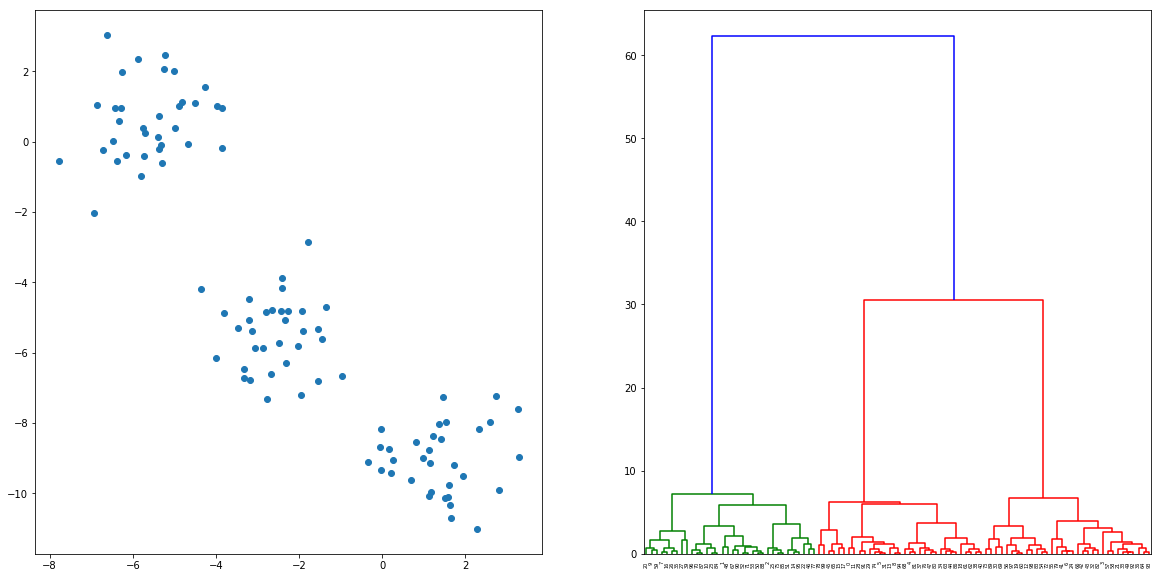

In [18]:
# 계층군집, 덴드로그램을 통한 군집 시각화
import numpy as np 
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics, model_selection
# from sklearn.cluster import AgglomerativeClustering

# 데이터 수집
x, y = datasets.make_blobs(
    n_samples = 100
    , random_state = 16
)

# 데이터 탐색 및 준비
print(x.shape)
print(y.shape)

# 도화지 준비 및 서브 플롯 추가후 ax로 plot수행
fig = plt.figure(figsize=(20, 10)) # figsize=(width, height)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 산점도
ax1.scatter(x[:,0], x[:,1])

# 각 점들간 거리 (ward)를 계산해서 반환
linkage_array =  hierarchy.ward(x)
hierarchy.dendrogram(linkage_array)
plt.show()



(100, 2)
(100,)
[2 2 2 1 2 0 2 0 2 0 0 2 2 1 2 1 1 1 0 1 0 1 2 1 2 2 1 2 2 0 0 2 1 0 0 0 0
 0 0 1 2 0 1 0 1 2 1 0 2 2 1 2 0 0 0 0 0 1 0 0 0 2 2 0 0 0 2 1 1 1 1 2 2 1
 1 1 2 2 0 1 2 1 2 1 0 1 1 2 0 0 0 1 1 2 0 1 1 2 2 1]
ARI = 1.0
ARI = 0.736


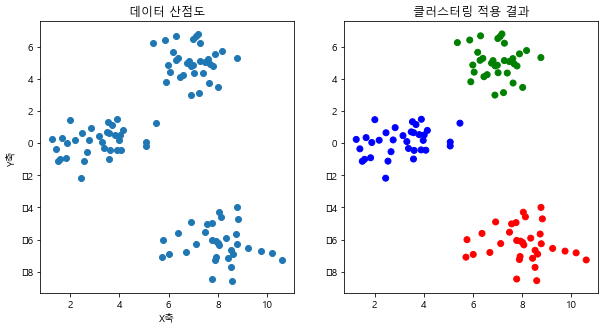

In [55]:
# 계층군집, 병합 군집 수행
import numpy as np 
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics, model_selection

from sklearn.cluster import AgglomerativeClustering # 병합군집 함수
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score # ARI, 실루엣계쑤


# 데이터 수집
x, y = datasets.make_blobs(
    n_samples = 100
    , random_state = 18
)

# 데이터 탐색 및 준비
print(x.shape)
print(y.shape)

# 한글 폰트 설정, 도화지 준비 및 서브 플롯 추가후 ax로 plot수행
plt.rc('font', family='Malgun Gothic')
fig = plt.figure(figsize=(10, 5)) # figsize=(width, height)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 산점도, 3개 클러스터로 나뉘어짐
ax1.scatter(x[:,0], x[:,1])
ax1.set_title('데이터 산점도')
ax1.set_xlabel('X축')
ax1.set_ylabel('Y축')

# 모델 훈련
model = AgglomerativeClustering(n_clusters = 3)
model_pred = model.fit_predict(x)

# 모델 성능 평가
# 병합 군집 알고리즘으로 분류된 클러스터를 시각화로 표시해보자
print(model_pred)

colors = ['blue', 'red', 'green']
ax2.scatter(x = x[:, 0], y = x[:, 1], c = getColors(model_pred))
ax2.set_title('클러스터링 적용 결과')

# ARI 계산(조정 랜드 지수)
print(f"ARI = {adjusted_rand_score(labels_true = y, labels_pred = model_pred)}")
# 실루엣 계수 계산
print(f"ARI = {silhouette_score(x, model_pred):0.3f}")

# 예측 클러스터를 순회하면서 0이면 blue, 1이면 red, 2면 green값을 부여한 배열 생성
def getColors(model_pred):
    colors = []
    for i in model_pred:
        if i == 0: 
            colors.append('blue')
        elif i == 1:
            colors.append('red')
        else:
            colors.append('green')
    return colors
        



(100, 2)
(100,)
[2 1 0 2 1 0 2 2 2 1 0 0 1 2 1 2 0 2 0 0 1 0 1 0 0 2 0 1 2 1 1 2 0 0 1 1 2
 2 1 1 0 0 1 1 1 1 0 2 1 1 1 1 2 1 0 2 0 1 2 2 2 1 0 1 2 1 0 2 0 1 2 0 0 2
 0 1 2 2 1 0 0 2 2 1 2 0 1 2 2 2 0 0 2 0 1 2 2 0 0 0]
ARI = 1.0
ARI = 0.732


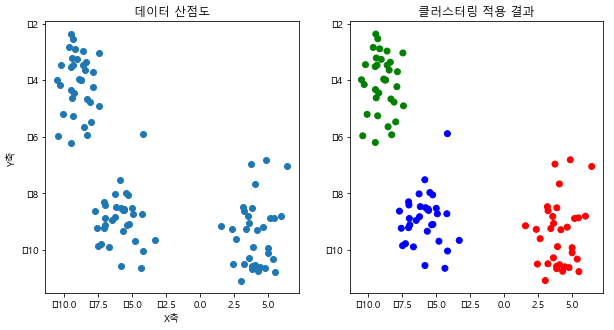

In [61]:
# 비계층군집, K평균 군집 수행
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics, model_selection

from sklearn.cluster import KMeans # K평균 군집 함수
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score # ARI, 실루엣계쑤


# 데이터 수집
x, y = datasets.make_blobs(
    n_samples = 100
    , random_state = 21
)

# 데이터 탐색 및 준비
print(x.shape)
print(y.shape)

# 한글 폰트 설정, 도화지 준비 및 서브 플롯 추가후 ax로 plot수행
plt.rc('font', family='Malgun Gothic')
fig = plt.figure(figsize=(10, 5)) # figsize=(width, height)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 산점도, 3개 클러스터로 나뉘어짐
ax1.scatter(x[:,0], x[:,1])
ax1.set_title('데이터 산점도')
ax1.set_xlabel('X축')
ax1.set_ylabel('Y축')

# 모델 훈련
model = KMeans(n_clusters = 3)
model_pred = model.fit_predict(x)

# 모델 성능 평가
# 병합 군집 알고리즘으로 분류된 클러스터를 시각화로 표시해보자
print(model_pred)

colors = ['blue', 'red', 'green']
ax2.scatter(x = x[:, 0], y = x[:, 1], c = getColors(model_pred))
ax2.set_title('클러스터링 적용 결과')

# ARI 계산(조정 랜드 지수)
print(f"ARI = {adjusted_rand_score(labels_true = y, labels_pred = model_pred)}")
# 실루엣 계수 계산
print(f"ARI = {silhouette_score(x, model_pred):0.3f}")

# 예측 클러스터를 순회하면서 0이면 blue, 1이면 red, 2면 green값을 부여한 배열 생성
def getColors(model_pred):
    colors = []
    for i in model_pred:
        if i == 0: 
            colors.append('blue')
        elif i == 1:
            colors.append('red')
        else:
            colors.append('green')
    return colors
        

